In [6]:
import scipy.io # To use the '.mat' files
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
for root, dirs, files in os.walk("/content/drive/MyDrive/AC_DATA2/AC_DATA2", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

/content/drive/MyDrive/AC_DATA2/AC_DATA2/ACB_1.mat
/content/drive/MyDrive/AC_DATA2/AC_DATA2/.DS_Store
/content/drive/MyDrive/AC_DATA2/AC_DATA2/ACS_1.mat
/content/drive/MyDrive/AC_DATA2/AC_DATA2/ACR_1.mat
/content/drive/MyDrive/AC_DATA2/AC_DATA2/Normal.mat


In [9]:
path = r'/content/drive/MyDrive/AC_DATA2/AC_DATA2/Normal.mat'
mat = scipy.io.loadmat(path)

In [10]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue May 23 13:01:19 2023'), ('__version__', '1.0'), ('__globals__', []), ('DE_DATA_1', array([[-0.438 ],
       [-0.0813],
       [ 0.578 ],
       ...,
       [ 0.524 ],
       [-0.0133],
       [-0.527 ]])), ('Healthy_data1', array([[-0.438 ],
       [-0.637 ],
       [-0.698 ],
       ...,
       [-0.527 ],
       [-0.357 ],
       [-0.0614]])), ('y', array([[-0.438 ],
       [-0.637 ],
       [-0.698 ],
       ...,
       [-0.527 ],
       [-0.357 ],
       [-0.0614]]))])

In [11]:
list(mat.keys())

['__header__', '__version__', '__globals__', 'DE_DATA_1', 'Healthy_data1', 'y']

In [12]:
key_name = list(mat.keys())[3]

In [13]:
DE_data = mat.get(key_name)

In [14]:
file_name

'Normal.mat'

In [15]:
fault = np.full((len(DE_data), 1), file_name[:-4])

In [16]:
df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

In [17]:
df_temp

,DE_data,fault
0,-0.4380,Normal
1,-0.0813,Normal
2,0.5780,Normal
3,-0.6490,Normal
4,0.2090,Normal
...,...,...
16662,0.3580,Normal
16663,-0.6660,Normal
16664,0.5240,Normal
16665,-0.0133,Normal


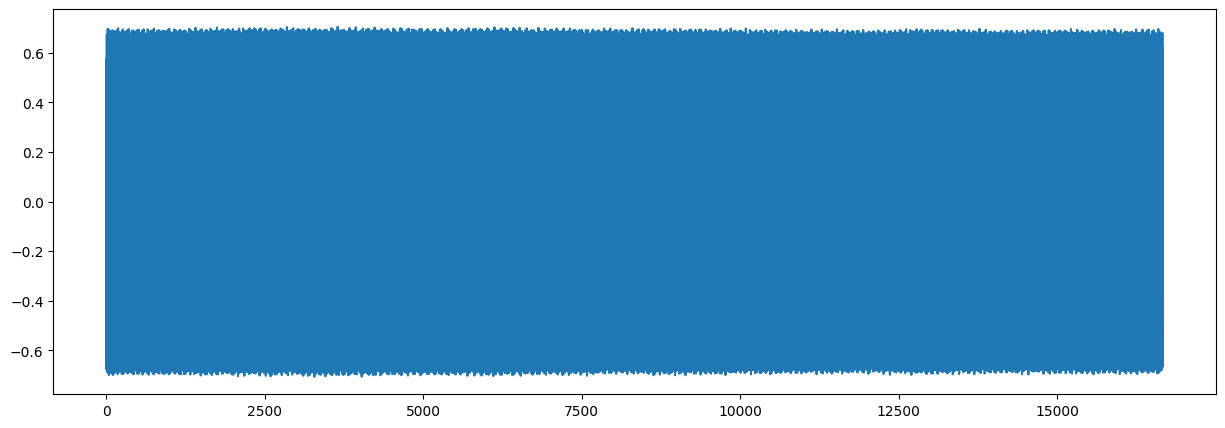

In [18]:
plt.figure(figsize=(15,5))
plt.plot(df_temp.iloc[:,0])
plt.show()

In [19]:
df=pd.DataFrame(columns=['DE_data','fault'])

for root, dirs, files in os.walk("0hp_load_48_KHz", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        key_name = list(mat.keys())[3]
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())

df.to_csv('AC_DATA2_faults.csv',index=False)

In [20]:
df = pd.read_csv('AC_DATA2_faults.csv')

In [21]:
df

,DE_data,fault


In [22]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

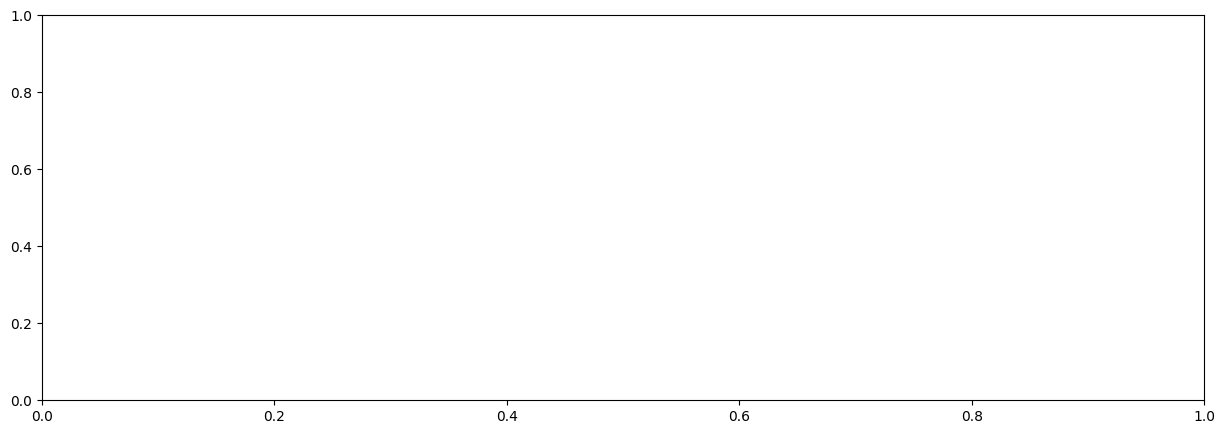

In [23]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df.iloc[::100,:],y='DE_data',x=np.arange(0,len(df),100),hue='fault')
plt.show()

In [24]:
load=3

df=pd.DataFrame(columns=['DE_data','fault'])

for root, dirs, files in os.walk("AC_DATA2_faults.csv".format(load), topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        for k in list(mat.keys()):
            if k[5:]== 'DE_time':
                key_name=k
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())

df.to_csv('AC_DATA2_faults.csv'.format(load),index=False)